In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve

import sys
sys.path.append('../')

import pandas as pd
import networkx as nx
import tqdm
from PIL import Image

import skeletor as sk

import colour

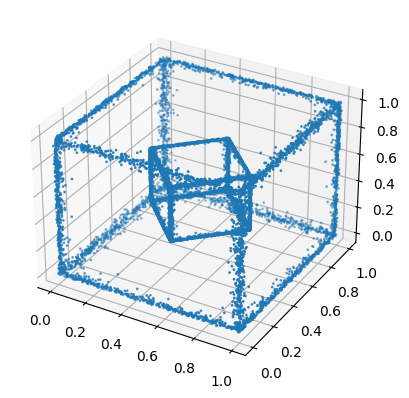

In [2]:
data = 'Data/cube_2.npy'
dsFactor = 1
neighborDistance = 25
np.random.seed(10)

#%matplotlib qt
with open(data, 'rb') as f:
    rawData = np.load(f)
    
order = np.arange(rawData.shape[0])
np.random.shuffle(order)
points = rawData[order][::dsFactor,:]

#plt.scatter(scatterPoints[:,0], scatterPoints[:,2], s=.2)
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2], s=1)
plt.show()

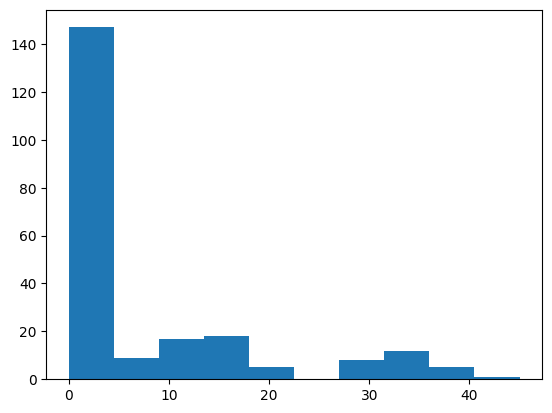

Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1
Condition 1


In [5]:
octree = sk.Octree(points, 1, maxPointsPerBox=100, minPointsPerBox=10, minimizeBoxes=True, adaptiveBoxes=True)
#octree2 = sk.Octree(points, 1000, maxPointsPerBox=100, minimizeBoxes=True, adaptiveBoxes=False)

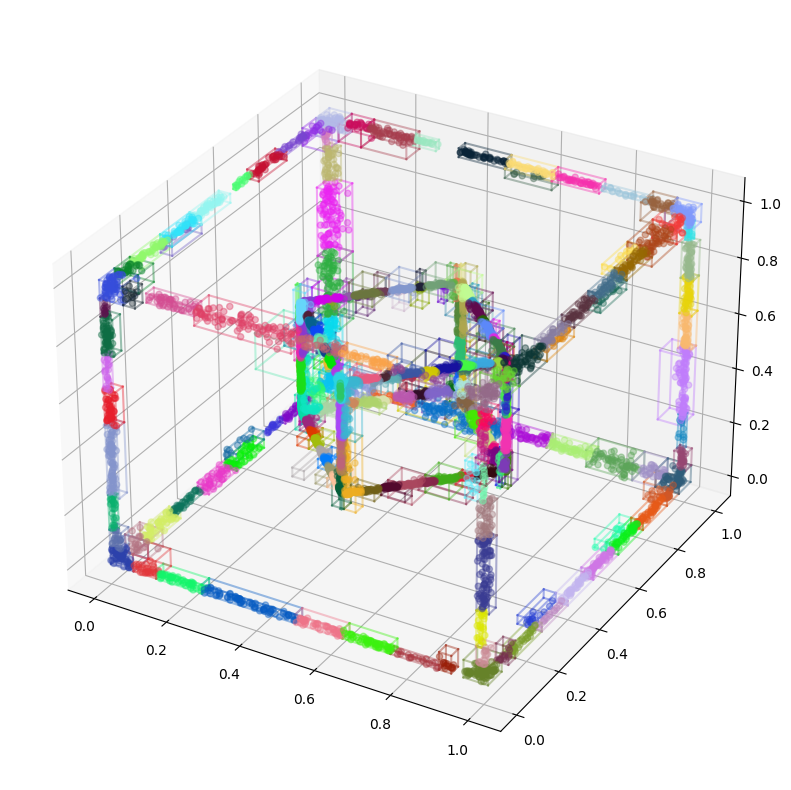

In [6]:
%matplotlib inline

fig = octree.plot()

fig.set_size_inches((10,10))
plt.show()

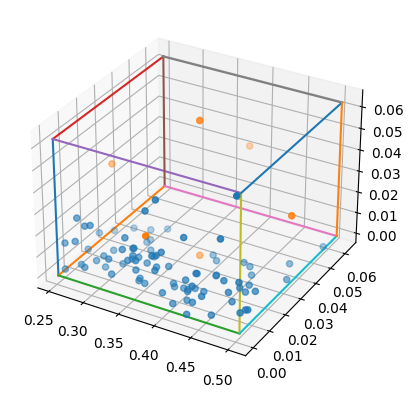

In [4]:
octree.boxes[0].plot(drawFaceCenters=True)
plt.show()

In [5]:
octree.boxes[0].getBoxFaceCenters()

array([[ 0.6312495 ,  0.03156232,  0.03156233],
       [ 0.1262499 ,  0.03156232,  0.03156233],
       [ 0.3787497 ,  0.09468695,  0.03156233],
       [ 0.3787497 , -0.03156232,  0.03156233],
       [ 0.3787497 ,  0.03156232,  0.09468699],
       [ 0.3787497 ,  0.03156232, -0.03156233]])

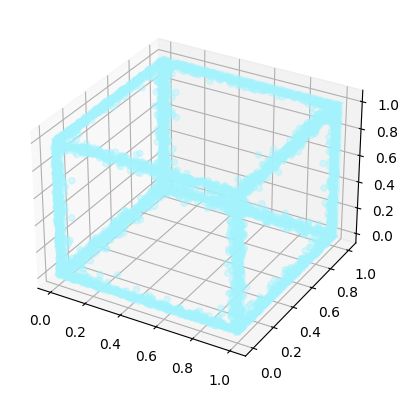

In [5]:
%matplotlib inline

colors = [str(c) for c in colour.Color('pink').range_to(colour.Color('black'), len(octree.boxes))]
np.random.shuffle(colors)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(octree.boxes)):
    octree.boxes[i].plot(ax=ax, c=str(colour.Color(pick_for=i)), alpha=.4)
    
plt.show()

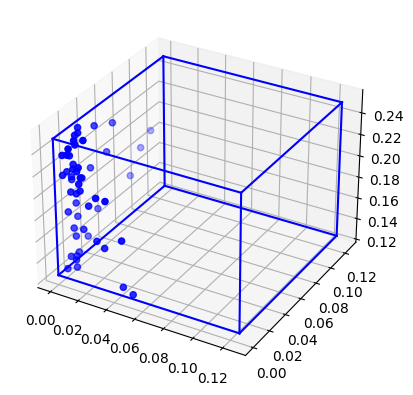

In [4]:
octree.boxes[1].plot(c='b')
plt.show()

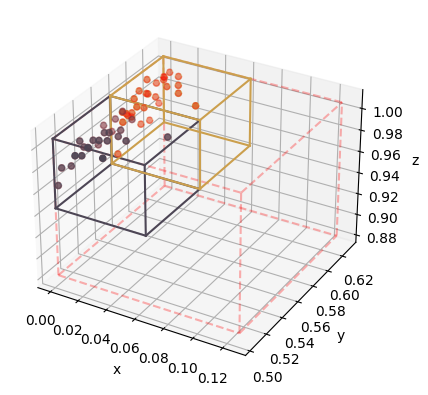

In [11]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
index = 15

#print(octree.boxes[index])
octree.boxes[index].plot(c='r', ax=ax, linestyle='--', alpha=.3)

newBoxes = octree.boxes[index].divide(8)
#print(newBoxes)
for n in newBoxes:
    n.plot(c=str(colour.Color(pick_for=n)), ax=ax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [ ]:
images = []

fps = 20
loop = 0
dsFactor = 1
divisions = 5
dt = 1

octree = sk.Octree(points, 1)
boxes = octree.boxes

for j in range(divisions):
    for i in tqdm.tqdm(range(90//dt)):
        fig = plt.figure(figsize=(9,9))

        ax = fig.add_subplot(projection='3d')

        for k in range(len(boxes)):
            boxes[k].plot(ax=ax, c=str(colour.Color(pick_for=k)), alpha=.5)
        
        ax.view_init(-160, 90*j*dt+i*dt)

        fig.tight_layout()
        canvas = plt.get_current_fig_manager().canvas
        canvas.draw()

        images.append(Image.frombytes('RGB', canvas.get_width_height(),
                     canvas.tostring_rgb()))

        #plt.show()
        plt.close()
        
    newBoxes = []
    for b in boxes:
        newBoxes += b.divide(8)
        
    boxes = newBoxes
    
images[0].save(f'adaptive_boxes.gif', save_all=True, append_images=images[1:], duration=fps, loop=loop)

 18%|█████▊                           | 16/90 [00:57<04:02,  3.27s/it]

In [4]:
images[0].save(f'adaptive_boxes.gif', save_all=True, append_images=images[1:], duration=fps, loop=loop)

In [13]:
import itertools

CARTESIAN_BASIS = np.array([[1,0,0],
                            [0,1,0],
                            [0,0,1]])

def plotBox(corner, boxSize, ax=None, basis=CARTESIAN_BASIS, **kwargs):
    """
    """
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

    # Unit cube (sorta, side lengths are actually 2)
    r = [-1, 1]
    directions = np.array(list(itertools.product(r, r, r)))
    
    # Transform to given basis
    directions = np.array([np.dot(d, basis) for d in directions])

    # Choose only lines that have a magnitude of 2 (since we have a sorta unit cube),
    # removing diagonal lines.
    # For some godforsaken reason, using 64 bit floats will
    # identify two side lengths as different even though they are
    # the same (no idea why that's an issue here, it's not like I'm
    # using super tiny side lengths...) so we have to cast to 32 bit
    # floats. 
    lines = np.array([c for c in itertools.combinations(directions, 2) if np.sqrt(np.sum((c[1]-c[0])**2)).astype(np.float32) == r[1]-r[0]])

    # Size the basis may not be a simple cartesian basis,
    # we need to project the size of the box along the basis
    trueBoxSize = np.dot(boxSize, basis)
    print(trueBoxSize)
    
    # Now account for corner and boxsize
    centerToCornerLine = basis*boxSize
    print(centerToCornerLine)
    lines = [((c[0]+1)*boxSize/2 + corner, (c[1]+1)*boxSize/2 + corner) for c in lines]

    for v1, v2 in lines:
        ax.plot3D(*zip(v1, v2), **kwargs)

    return plt.gcf()

[0.         4.24264069 3.        ]
[[-2.12132034  2.12132034  0.        ]
 [ 2.12132034  2.12132034  0.        ]
 [ 0.          0.          3.        ]]


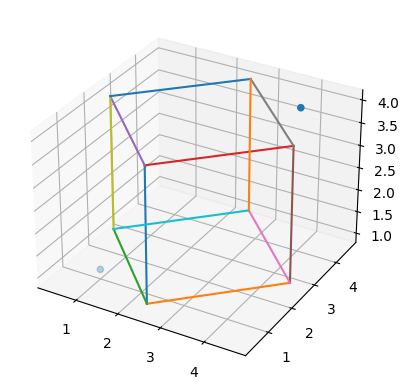

In [16]:
basis = np.array([[-1/np.sqrt(2), 1/np.sqrt(2), 0],
                  [1/np.sqrt(2), 1/np.sqrt(2), 0],
                  [0, 0, 1]])

plotBox([1,1,1], [3,3,3], basis=basis)
plt.gcf().gca().scatter([1,4], [1,4], [1,4])
plt.show()